In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import parse_trajectory

In [2]:
file_path = "traj.out"
traj_df = parse_trajectory(file_path)

In [3]:
traj_df.head()

,timestep,id,type,x,y,z,vx,vy,vz
0,0,1.0,1.0,-0.007764,0.003872,0.001848,-0.015794,0.007883,0.003761
1,0,2.0,1.0,-0.001109,2.697872,2.701748,-0.002250,0.010929,0.018818
2,0,3.0,1.0,2.692208,-0.009578,2.687882,-0.000595,-0.019489,-0.009397
3,0,4.0,1.0,2.698136,2.701272,-0.001149,0.011467,0.017850,-0.002335
4,0,5.0,1.0,0.003744,0.002798,5.389232,0.007615,0.005690,0.008608


Momentum changes between timesteps:
                     vx            vy            vz
timestep                                          
100      -4.579670e-16 -8.326673e-16 -2.914335e-16
200       2.359224e-16  4.996004e-16 -1.096345e-15
300       1.110223e-15 -8.326673e-17 -5.551115e-17
400      -5.828671e-16  1.804112e-15  8.049117e-16
500      -2.498002e-16 -6.869505e-16  2.046974e-16
...                ...           ...           ...
9500      4.302114e-16 -2.914335e-16 -2.983724e-16
9600      9.436896e-16  1.179612e-15 -2.081668e-17
9700      0.000000e+00  5.412337e-16 -9.436896e-16
9800     -3.053113e-15 -1.575129e-15  1.387779e-15
9900      3.705369e-15  8.257284e-16  2.317591e-15

[99 rows x 3 columns]
Angular Momentum changes between timesteps:
                 Lx        Ly        Lz
timestep                              
100      -0.303542  0.681106  1.405886
200       6.288648 -3.233900  6.042280
300      -8.793914  1.703499 -0.496142
400       3.367891 -2.899521  1.15826

/tmp/ipykernel_102136/547280159.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_angular_momentum = grouped.apply(angular_momentum)


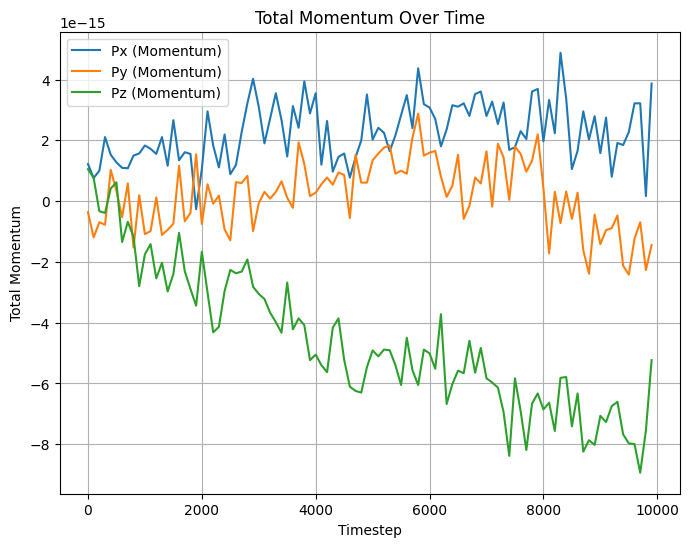

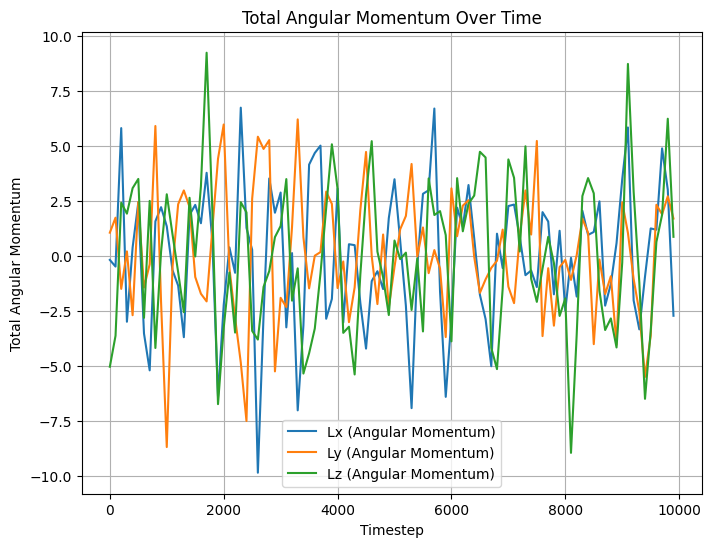

Momentum is conserved.
Angular Momentum is not conserved.


In [4]:
# Assign a uniform mass to all particles (you can replace this if masses differ)
particle_mass = 1.0  # Assuming all particles have a mass of 1 unit

# Step 1: Calculate total momentum at each timestep
def calculate_total_momentum(df):
    grouped = df.groupby("timestep")
    total_momentum = grouped[["vx", "vy", "vz"]].apply(lambda g: (g * particle_mass).sum())
    return total_momentum

# Step 2: Calculate total angular momentum at each timestep
def calculate_total_angular_momentum(df):
    def angular_momentum(group):
        positions = group[["x", "y", "z"]].values
        velocities = group[["vx", "vy", "vz"]].values
        angular_momentum = np.cross(positions, velocities * particle_mass)
        return angular_momentum.sum(axis=0)

    grouped = df.groupby("timestep")
    total_angular_momentum = grouped.apply(angular_momentum)
    return pd.DataFrame(total_angular_momentum.tolist(), index=total_angular_momentum.index, columns=["Lx", "Ly", "Lz"])

# Step 3: Analyze and verify conservation
# Total Momentum
total_momentum = calculate_total_momentum(traj_df)
momentum_change = total_momentum.diff().dropna()
print("Momentum changes between timesteps:\n", momentum_change)

# Total Angular Momentum
total_angular_momentum = calculate_total_angular_momentum(traj_df)
angular_momentum_change = total_angular_momentum.diff().dropna()
print("Angular Momentum changes between timesteps:\n", angular_momentum_change)

# Step 4: Plot results to visualize conservation
# Plot Momentum
plt.figure(figsize=(8, 6))
plt.plot(total_momentum.index, total_momentum["vx"], label="Px (Momentum)")
plt.plot(total_momentum.index, total_momentum["vy"], label="Py (Momentum)")
plt.plot(total_momentum.index, total_momentum["vz"], label="Pz (Momentum)")
plt.xlabel("Timestep")
plt.ylabel("Total Momentum")
plt.title("Total Momentum Over Time")
plt.legend()
plt.grid()
plt.show()

# Plot Angular Momentum
plt.figure(figsize=(8, 6))
plt.plot(total_angular_momentum.index, total_angular_momentum["Lx"], label="Lx (Angular Momentum)")
plt.plot(total_angular_momentum.index, total_angular_momentum["Ly"], label="Ly (Angular Momentum)")
plt.plot(total_angular_momentum.index, total_angular_momentum["Lz"], label="Lz (Angular Momentum)")
plt.xlabel("Timestep")
plt.ylabel("Total Angular Momentum")
plt.title("Total Angular Momentum Over Time")
plt.legend()
plt.grid()
plt.show()

# Conservation Check
momentum_conserved = momentum_change.abs().max().max() < 1e-5  # Tolerance for numerical errors
angular_momentum_conserved = angular_momentum_change.abs().max().max() < 1e-5

if momentum_conserved:
    print("Momentum is conserved.")
else:
    print("Momentum is not conserved.")

if angular_momentum_conserved:
    print("Angular Momentum is conserved.")
else:
    print("Angular Momentum is not conserved.")
